In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

plt.rcParams['figure.figsize'] = [10, 10]

# Hackathon #2 - Data Wrangling (Instructor solution)

Table of Contents
- [Load Wrangled Train Dataframe](#Load-Wrangled-Train-Dataframe)
- [EDA](#EDA)
- [Feature Selection](#Feature-Selection)
- [Random Forest Classifier](#Random-Forest-Classifier)
- [Classify Test Data](#Classify-Test-Data)

## Load Wrangled Train Dataframe

In [2]:
df = pd.read_csv("merge_data.csv").set_index('id')
display(df)

,submitinfotoemail,iframeorframe,missingtitle,imagesonlyinform,subdomainlevelrt,urllengthrt,pctextresourceurlsrt,abnormalextformactionr,extmetascriptlinkrt,pctextnullselfredirecthyperlinksrt,...,numquerycomponents,insecureforms,urllength,pctnullselfredirecthyperlinks,numdots,frequentdomainnamemismatch,numsensitivewords,pathlength,extformaction,pctexthyperlinks
id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,72.0,0.0,3.0,0.0,0.0,44.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,72.0,0.0,3.0,0.0,0.0,44.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2.0,1.0,144.0,0.0,3.0,0.0,1.0,16.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,58.0,0.0,3.0,0.0,0.0,24.0,0.0,0.0
5,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,79.0,0.0,3.0,0.0,0.0,50.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,2.0,1.0,50.0,0.0,3.0,0.0,0.0,10.0,0.0,0.0
9997,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2.0,1.0,50.0,0.0,3.0,0.0,0.0,10.0,0.0,0.0
9998,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,57.0,0.0,2.0,0.0,0.0,34.0,0.0,0.0


## EDA

In [3]:
df.describe()

,submitinfotoemail,iframeorframe,missingtitle,imagesonlyinform,subdomainlevelrt,urllengthrt,pctextresourceurlsrt,abnormalextformactionr,extmetascriptlinkrt,pctextnullselfredirecthyperlinksrt,...,numquerycomponents,insecureforms,urllength,pctnullselfredirecthyperlinks,numdots,frequentdomainnamemismatch,numsensitivewords,pathlength,extformaction,pctexthyperlinks
count,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.0,8000.000000,8000.0,8000.0,...,8000.000000,8000.000000,8000.000000,8000.0,8000.000000,8000.0,8000.000000,8000.000000,8000.000000,8000.0
mean,0.125750,0.339000,0.03400,0.029875,0.960500,0.019750,0.0,0.790250,0.0,0.0,...,0.457125,0.847125,70.277500,0.0,2.447250,0.0,0.111125,35.594375,0.101125,0.0
std,0.331588,0.473399,0.18124,0.170253,0.236531,0.815134,0.0,0.523726,0.0,0.0,...,1.350144,0.359889,33.543839,0.0,1.323135,0.0,0.369179,24.767550,0.301513,0.0
min,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,0.0,-1.000000,0.0,0.0,...,0.000000,0.000000,14.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,0.0,1.000000,0.0,0.0,...,0.000000,1.000000,48.000000,0.0,2.000000,0.0,0.000000,18.000000,0.000000,0.0
50%,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.0,1.000000,0.0,0.0,...,0.000000,1.000000,62.000000,0.0,2.000000,0.0,0.000000,30.000000,0.000000,0.0
75%,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,...,0.000000,1.000000,84.000000,0.0,3.000000,0.0,0.000000,48.000000,0.000000,0.0
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,...,23.000000,1.000000,253.000000,0.0,16.000000,0.0,3.000000,161.000000,1.000000,0.0


In [4]:
df.dtypes

submitinfotoemail                     float64
iframeorframe                         float64
missingtitle                          float64
imagesonlyinform                      float64
subdomainlevelrt                      float64
urllengthrt                           float64
pctextresourceurlsrt                  float64
abnormalextformactionr                float64
extmetascriptlinkrt                   float64
pctextnullselfredirecthyperlinksrt    float64
domaininpaths                         float64
querylength                           float64
rightclickdisabled                    float64
domaininsubdomains                    float64
extfavicon                            float64
nohttps                               float64
hostnamelength                        float64
numunderscore                         float64
fakelinkinstatusbar                   float64
doubleslashinpath                     float64
pctextresourceurls                    float64
atsymbol                          

<AxesSubplot:>

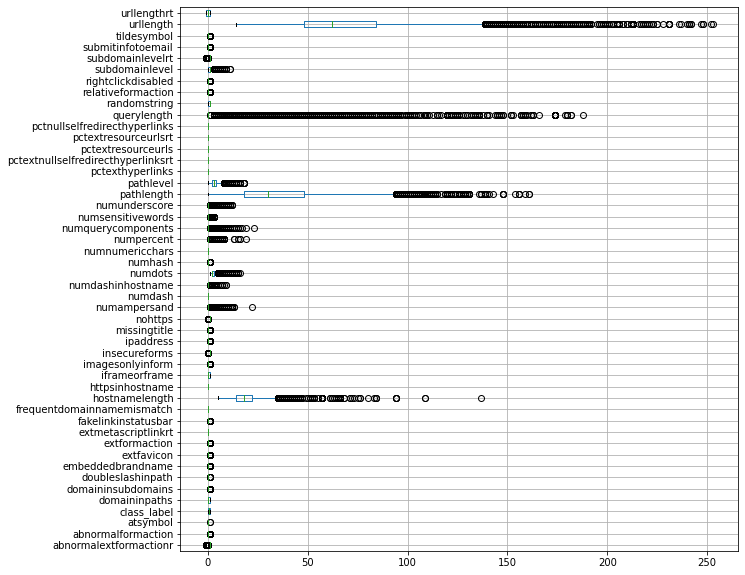

In [5]:
df[df.columns.difference(['id'])].plot.box(vert = False, grid = True)

<AxesSubplot:ylabel='id'>

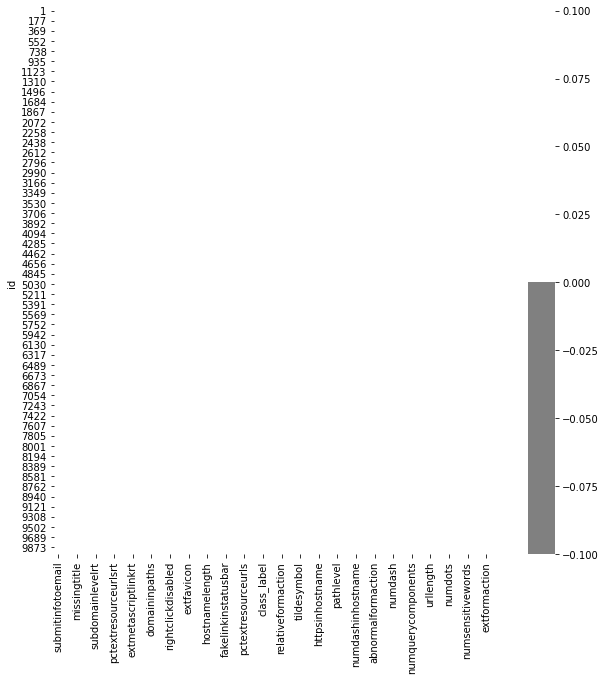

In [6]:
colours = ['#808080','#FFFFFF'] # specify the colours - gray is missing. white is not missing.
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

<AxesSubplot:>

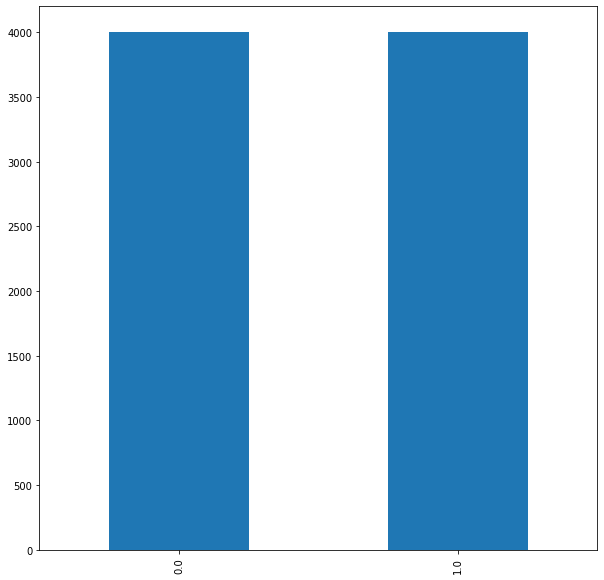

In [7]:
df['class_label'].value_counts().plot(kind='bar')

In [8]:
X = df.drop(['class_label'], axis=1)
y = df['class_label']

## Feature Selection

Feature selection done with [sklearn mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)

This method estimate [mutual information](https://en.wikipedia.org/wiki/Mutual_information) (mi) for a discrete target variable.

Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [9]:
discrete_features = X.dtypes == int # only works with int! max 37 features out of 48

mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

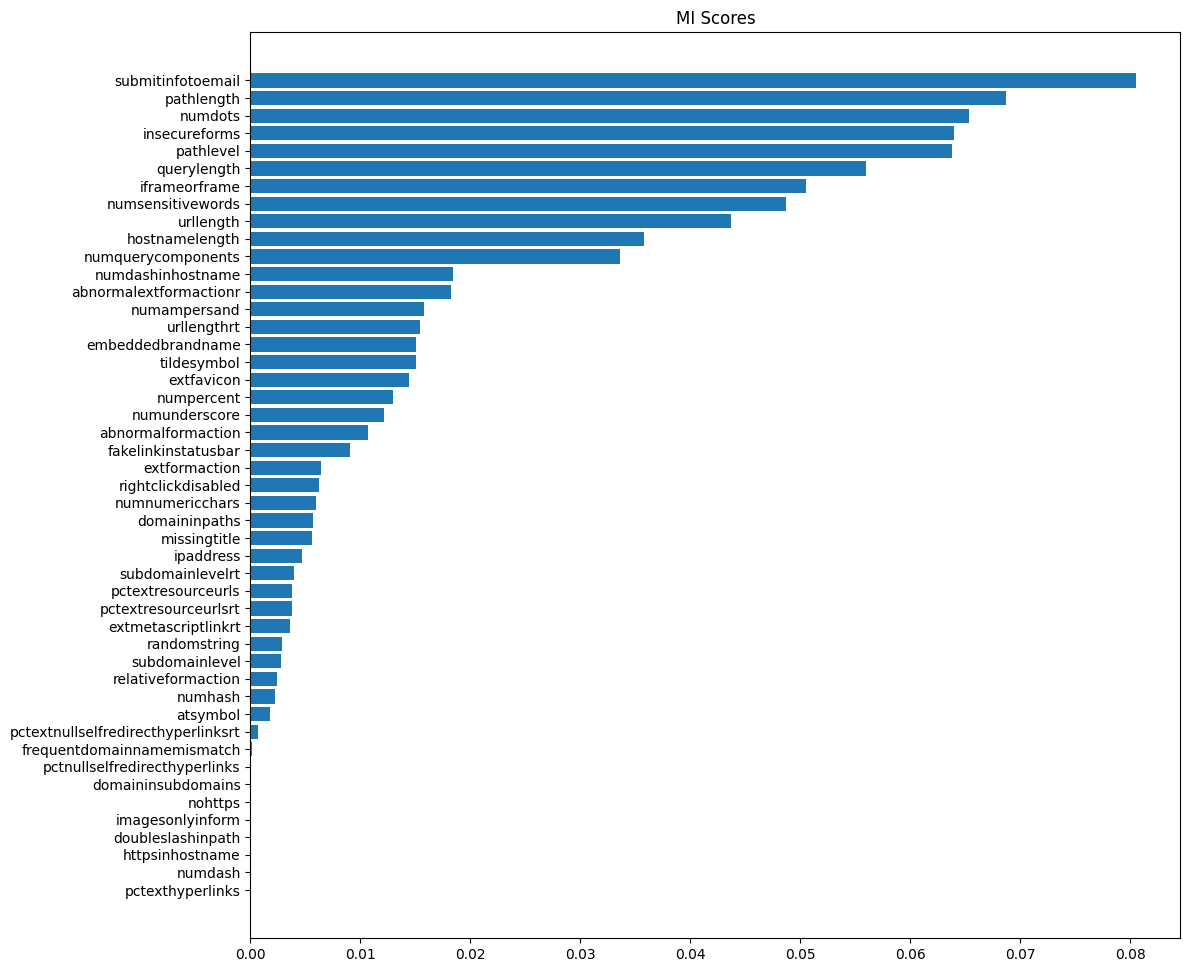

In [10]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")
    
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)

In [11]:
top_n_features = mi_scores.sort_values(ascending=False).head(30).index.tolist()

## Get train & Test Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Random Forest Classifier

In [13]:
clf = RandomForestClassifier(n_estimators=500, 
            max_depth=32, 
            max_features=1.0,
            random_state=0)


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [24]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Performance for RFC Model with all features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(precision, recall, f1, accuracy))

Performance for RFC Model with all features is precision : 0.9100985221674877, recall : 0.9214463840399002, f1 score : 0.9157372986369269, accuracy : 0.915


## HyperParameter Tunning

In [23]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

forest = RandomForestClassifier(random_state = 1, n_estimators = 10, min_samples_split = 1)

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1, scoring='f1')
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [25]:
gridF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [27]:
y_pred = bestF.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Performance for RFC Model after HyperParameter Tunning with Top all features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(precision, recall, f1, accuracy))

Performance for RFC Model after HyperParameter Tunning with Top all features is precision : 0.913151364764268, recall : 0.9177057356608479, f1 score : 0.9154228855721394, accuracy : 0.915


## Feature importance

<AxesSubplot:>

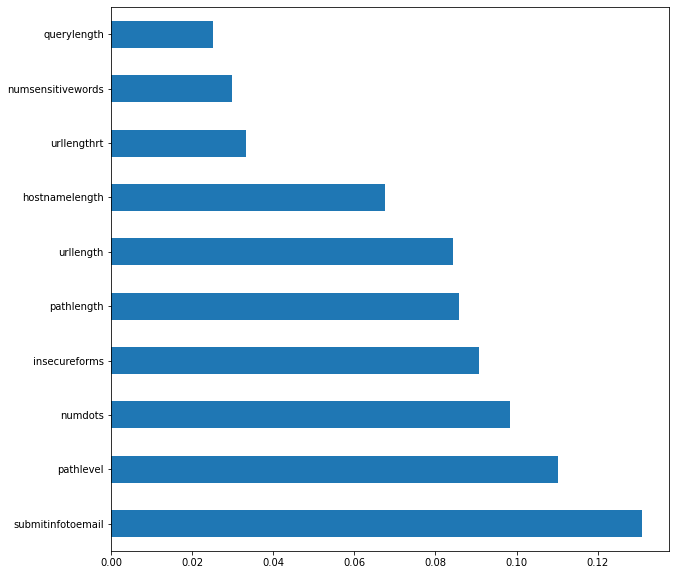

In [31]:
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

## XGBoost!

In [35]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
learning_rate = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1] 

xgb = XGBClassifier(n_estimators=1200, max_depth=25,n_jobs=-1)

hyperXGB = dict(n_estimators = n_estimators, max_depth = max_depth,  
             learning_rate = learning_rate)

gridXGB = GridSearchCV(xgb, hyperXGB, cv = 3, verbose = 1, 
                      n_jobs = -1, scoring='f1')
gridXGB = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [37]:
gridXGB.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [36]:
y_pred = gridXGB.predict(X_test)

In [38]:
precision = precision_score(y_test, clf_xbb_y_pred)
recall = recall_score(y_test, clf_xbb_y_pred)
f1 = f1_score(y_test, clf_xbb_y_pred)
accuracy = accuracy_score(y_test, clf_xbb_y_pred)

print("Performance for XGBoostC Model with Top all features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format( precision, recall, f1, accuracy))

Performance for XGBoostC Model with Top all features is precision : 0.9100985221674877, recall : 0.9214463840399002, f1 score : 0.9157372986369269, accuracy : 0.915


## Classify Test Data

In [16]:
df_test = pd.read_csv("../../data/test.csv")

#lowercase column names to match wrangled dataframe
df_test.columns = df_test.columns.str.lower()

In [19]:
#X_test_data = df_test[top_n_features]
X_test_data = df_test[X.columns]

In [39]:
#y_pred_test_data = clf.predict(X_test_data)
#y_pred_test_data = gridF.predict(X_test_data)
y_pred_test_data = gridXGB.predict(X_test_data)

In [40]:
df_to_submit = pd.DataFrame(index=df_test.id, data={'CLASS_LABEL': y_pred_test_data})
df_to_submit

,CLASS_LABEL
id,
7920,0.0
912,1.0
6632,0.0
4537,1.0
8487,0.0
...,...
599,1.0
8355,1.0
4745,1.0


In [41]:
df_to_submit.to_csv('baseline_XGB_hyperparameter_allfeatures.csv')